In [26]:
#Эксперименты 
import numpy as np
import scipy.io.wavfile
from scipy.io import wavfile
import math
import matplotlib.pyplot as plt
import wave
import random 
import math
import pandas as pd

a = np.random.random(30000)
b = np.random.random(30000)
#Убрал потому что если в scipy.io.wavfile.write подаешь float32 то значения должны быть от -1 до 1
#a = [int (i * 2000) for i in a] 
b = [int (i * 3700) for i in b]
a = np.asarray(a, dtype=np.float32)
b = np.asarray(b, dtype=np.float16)
c = np.concatenate((a,b), axis=0)
d = np.array([a,b]).T
rate = 16000
scipy.io.wavfile.write('lol.wav',rate, a) #Тут получается хороший такой шум


In [50]:
df = pd.read_csv('lbm_out_data/lbm_test_data1.csv', header =None)
arr = np.array(df.iloc[1], dtype=np.float32)
arr = arr[1:]
arr -= 1
coefficients = np.polyfit( range(len(arr)), arr, 1 ) #where 1 is the degree of freedom
p = np.poly1d( coefficients ) 
for i in range(len(arr)):
    arr[i] -= p(i)
arr /= np.linalg.norm(arr)

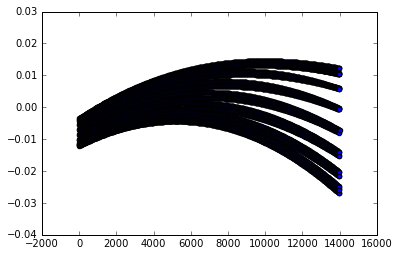

In [55]:
#Рисование массива который пихаем в wav
%matplotlib inline
plt.scatter(range(len(arr)), arr)
#plt.plot(range(len(arr)), p(range(len(arr))))
#plt.savefig('gr.png')

In [53]:
import pandas as pd
df = pd.read_csv('lbm_out_data/lbm_test_data1.csv', header =None)
df1 = pd.read_csv('lbm_out_data/lbm_test_data.csv',header =None)

arr = np.array(df.iloc[1], dtype=np.float32)
arr1 = np.array(df1.iloc[1], dtype=np.float32)

arr = arr[1:]
arr1  = arr1[1:]
#чтобы удлинить массив берем из другого файла еще одну точку
#arr = np.concatenate((arr,arr1))

arr -= 1
coefficients = np.polyfit( range(len(arr)), arr, 1 ) #where 1 is the degree of freedom
p = np.poly1d( coefficients ) 
for i in range(len(arr)):
    arr[i] -= p(i)
#print(np.linalg.norm(arr))

arr /= np.linalg.norm(arr) #Входные в wav значения в формате float32 должны быть от -1 до 1
arr = np.asarray(arr, dtype=np.float32)
rate = 7000
scipy.io.wavfile.write('lol.wav',rate,arr)

[ 1.034495    1.03437924  1.03431988 ...,  1.08834636  1.0877049
  1.08699667]
[ -1.06902875e-03  -1.18850905e-03  -1.25160336e-03 ...,   6.03837951e-04
  -4.13553171e-05  -7.53305794e-04]
[-0.01027555 -0.011424   -0.01203046 ...,  0.00580411 -0.00039751
 -0.00724081]


array([-0.01027555, -0.011424  , -0.01203046, ...,  0.00580411,
       -0.00039751, -0.00724081], dtype=float32)

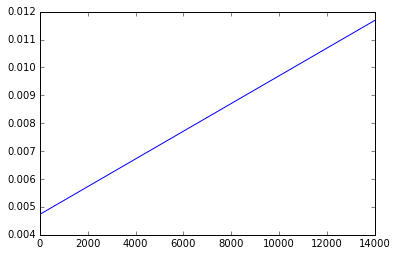

In [41]:
coefficients = np.polyfit( range(len(arr)), arr, 1 ) #where 1 is the degree of freedom
p = np.poly1d( coefficients ) 
x = range(len(arr)) #generates 100 points between 0 and 5 to plot 'curve'
plt.plot( x, p(x), label='Best Fit Line' )

array([ 0.00473528,  0.0047353 ,  0.00473533,  0.00473535,  0.00473538,
        0.0047354 ,  0.00473543,  0.00473545,  0.00473548,  0.0047355 ,
        0.00473553,  0.00473555,  0.00473558,  0.0047356 ,  0.00473563,
        0.00473565,  0.00473568,  0.0047357 ,  0.00473573,  0.00473575,
        0.00473578,  0.0047358 ,  0.00473583,  0.00473585,  0.00473588,
        0.0047359 ,  0.00473593,  0.00473595,  0.00473598,  0.004736  ,
        0.00473603,  0.00473606,  0.00473608,  0.00473611,  0.00473613,
        0.00473616,  0.00473618,  0.00473621,  0.00473623,  0.00473626,
        0.00473628,  0.00473631,  0.00473633,  0.00473636,  0.00473638,
        0.00473641,  0.00473643,  0.00473646,  0.00473648,  0.00473651,
        0.00473653,  0.00473656,  0.00473658,  0.00473661,  0.00473663,
        0.00473666,  0.00473668,  0.00473671,  0.00473673,  0.00473676,
        0.00473678,  0.00473681,  0.00473683,  0.00473686,  0.00473688,
        0.00473691,  0.00473693,  0.00473696,  0.00473698,  0.00

# Дальше просто разные способы визуализации 

In [ ]:
# Load the data and calculate the time of each sample
samplerate, data = wavfile.read('lol.wav')
times = np.arange(len(data))/float(samplerate)

# Make the plot
# You can tweak the figsize (width, height) in inches
#plt.figure(figsize=(range(len(times)), 4))
plt.plot(times, data, color='k') 
plt.xlim(times[0], times[-1])
plt.xlabel('time (s)')
plt.ylabel('amplitude')
# You can set the format by changing the extension
# like .pdf, .svg, .eps
#plt.savefig('plot.png', dpi=100)
plt.show()

data

In [ ]:
#Это просто из инета для визуалтзации 2-х каналов
import wave
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import math

types = {
    1: np.int8,
    2: np.int16,
    4: np.int32
}

def format_time(x, pos=None):
    global duration, nframes, k
    progress = int(x / float(nframes) * duration * k)
    mins, secs = divmod(progress, 60)
    hours, mins = divmod(mins, 60)
    out = "%d:%02d" % (mins, secs)
    if hours > 0:
        out = "%d:" % hours
    return out

def format_db(x, pos=None):
    if pos == 0:
        return ""
    global peak
    if x == 0:
        return "-inf"

    db = 20 * math.log10(abs(x) / float(peak))
    return int(db)

wav = wave.open("lol.wav", mode="r")
(nchannels, sampwidth, framerate, nframes, comptype, compname) = wav.getparams()

duration = nframes / framerate
w, h = 800, 300
k = nframes/w/32
DPI = 72
peak = 256 ** sampwidth / 2

content = wav.readframes(nframes)
samples = np.fromstring(content, dtype=types[sampwidth])

plt.figure(1, figsize=(float(w)/DPI, float(h)/DPI), dpi=DPI)
plt.subplots_adjust(wspace=0, hspace=0)

for n in range(nchannels):
    channel = samples[n::nchannels]

    channel = channel[::int(k)]
    if nchannels == 1:
        channel = channel - peak

    axes = plt.subplot(2, 1, n+1, axisbg="k")
    axes.plot(channel, "g")
    axes.yaxis.set_major_formatter(ticker.FuncFormatter(format_db))
    plt.grid(True, color="w")
    axes.xaxis.set_major_formatter(ticker.NullFormatter())

axes.xaxis.set_major_formatter(ticker.FuncFormatter(format_time))
plt.savefig("wave", dpi=DPI)
plt.show()